In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
!ls

Getting IDs-Copy1.ipynb
Getting Uniprot IDs from big file-Copy1.ipynb
IDs1.txt
IDs10.txt
IDs11.txt
IDs2.txt
IDs3.txt
IDs4.txt
IDs5.txt
IDs6.txt
IDs7.txt
IDs8.txt
IDs9.txt
Ids.txt
Uniprotfulllength.fasta
Untitled.ipynb
helix1.hmm
helix1.out
helix10.hmm
helix10.out
helix11.hmm
helix11.out
helix2.hmm
helix2.out
helix3.hmm
helix3.out
helix4.hmm
helix4.out
helix5.hmm
helix5.out
helix6.hmm
helix6.out
helix7.hmm
helix7.out
helix8.hmm
helix8.out
helix9.hmm
helix9.out
helixali1.fasta
helixali1.sto
helixali10.fasta
helixali10.sto
helixali11.fasta
helixali11.sto
helixali2.fasta
helixali2.sto
helixali3.fasta
helixali3.sto
helixali4.fasta
helixali4.sto
helixali5.fasta
helixali5.sto
helixali6.fasta
helixali6.sto
helixali7.fasta
helixali7.sto
helixali8.fasta
helixali8.sto
helixali9.fasta
helixali9.sto
matches_to_matrix.ipynb
stockholm_example.ipynb


First create a dictionary with all known IDs

In [29]:
matchdict = {}
with open("Ids.txt") as ifh:
    for idx in (_.strip() for _ in ifh.readlines()):
        matchdict[idx] = [0] * 11

In [30]:
len(matchdict)

63623

Load in each series of matches in turn (skipping any line that isn't in the dictionary)

In [31]:
for helix in range(11):
    failcount = 0
    helixidx = helix+1
    with open(f"IDs{helixidx}.txt") as ifh:
        for idx in (_.strip() for _ in ifh.readlines()):
            try:
                matchdict[idx][helix] += 1
            except KeyError:
                # Catching count of failed additions to dictionary
                failcount +=1
        print(f"{helixidx=} {failcount=}")

helixidx=1 failcount=0
helixidx=2 failcount=1
helixidx=3 failcount=1
helixidx=4 failcount=1
helixidx=5 failcount=1
helixidx=6 failcount=1
helixidx=7 failcount=1
helixidx=8 failcount=1
helixidx=9 failcount=1
helixidx=10 failcount=1
helixidx=11 failcount=1


In [32]:
list(matchdict.items())[:10]

[('A0A3M6V931', [3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2]),
 ('A0A3R7Y3I5', [3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2]),
 ('A0A0G4MCH1', [2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2]),
 ('A0A1I8FXG0', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 ('A0A1I8HTF6', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 ('A0A3M6UJ14', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 ('A0A336MBT3', [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 ('A0A1Y1Y6N9', [2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0]),
 ('A0A1I8GPP1', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 ('A0A553N736', [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])]

In [33]:
dfm = pd.DataFrame.from_dict(matchdict, orient="index")

In [34]:
dfm

,0,1,2,3,4,5,6,7,8,9,10
A0A3M6V931,3,0,0,0,0,3,0,0,0,3,2
A0A3R7Y3I5,3,0,0,0,0,3,0,0,0,3,2
A0A0G4MCH1,2,2,0,2,0,2,0,0,2,0,2
A0A1I8FXG0,0,0,0,0,0,0,0,0,0,0,0
A0A1I8HTF6,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
A0A6A6UTM1,0,0,0,0,0,0,0,0,0,0,0
A0A438JQI9,0,0,0,0,0,0,0,0,0,0,0
A0A109LCE4,0,0,0,0,0,0,0,0,0,0,0
A0A0K8TXL7,0,0,0,0,0,0,0,0,0,0,0


In [35]:
arr = np.array(list(matchdict.values()))

In [36]:
type(arr)

numpy.ndarray

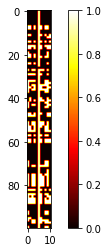

In [41]:
plt.imshow(arr[500:600,:], cmap='hot')
plt.colorbar()
plt.show()

In [16]:
# True if first and second column are equal to 1
all_hit = np.all(arr == 1, axis=1)
all_hit

array([False, False, False, ..., False, False, False])

In [17]:
# Total count of matches with 1 in first and second position
sum(all_hit)

0

In [18]:
# Which rows have matches in first and second position?
np.where(all_hit)

(array([], dtype=int64),)

In [15]:
# Which sequences do these correspond to?
matcharr = np.array(list(matchdict.keys()))
matcharr[all_hit]

array(['A0A0F2PP61', 'A0A0F2NHG8', 'A0A2L2XA79', ..., 'A0A7V2T4A5',
       'A0A376U5T1', 'A0A0D0TYP7'], dtype='<U10')

In [16]:
# Check result
for idx in matcharr[all_hit][:10]:
    print(f"{idx=} {matchdict[idx]}")

idx='A0A0F2PP61' [1, 1]
idx='A0A0F2NHG8' [1, 1]
idx='A0A2L2XA79' [1, 1]
idx='A0A1W1W1D7' [1, 1]
idx='K2EVA7' [1, 1]
idx='A0A2V7EY94' [1, 1]
idx='A0A7V3XLY7' [1, 1]
idx='A0A2V6PUL0' [1, 1]
idx='A0A358QVY4' [1, 1]
idx='W0I1H5' [1, 1]


In [27]:
# Which sequences have single matches to helix 2?
hit_in_2 = arr[:, 1] == 1  # Boolean array
matcharr[hit_in_2]  # All sequences with single match to helix 2
print(f"{len(matcharr[hit_in_2])=}")

len(matcharr[hit_in_2])=17096


In [35]:
# Multiple hits in any column?
multi_hit = np.any(arr > 1, axis=1)
matcharr[multi_hit]

array(['A0A3M6V931', 'A0A3R7Y3I5', 'A0A0G4MCH1', 'A0A1Y1Y6N9',
       'A0A0G4KE81', 'J9I5T7', 'A0A2J8A3F4', 'J9ID18', 'A0A553P3C1',
       'G5CA94'], dtype='<U10')

In [36]:
for idx in matcharr[multi_hit]:
    print(f"{idx=} {matchdict[idx]}")

idx='A0A3M6V931' [3, 0]
idx='A0A3R7Y3I5' [3, 0]
idx='A0A0G4MCH1' [2, 2]
idx='A0A1Y1Y6N9' [2, 2]
idx='A0A0G4KE81' [2, 2]
idx='J9I5T7' [2, 0]
idx='A0A2J8A3F4' [0, 2]
idx='J9ID18' [2, 0]
idx='A0A553P3C1' [2, 0]
idx='G5CA94' [2, 0]
